


# Project: MONETARY AGGREGATES ON MACRO ECONOMIC VAIRABLES
                              [DATASET INVESTIGATION - CENTRAL BANK OF NIGERIA DATA]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limit">Limitation</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

> Choose a country and calculate between 20-35 years running window correlation between growth rates of money supply (measured by M2 or M3 where available) and: a) real output; b) nominal output; c) money market rates. If possible use quarterly or monthly data.

<a id='intro'></a>
## Introduction

### Dataset Description 

This project is center on Monetary vairables in  developing Economies like Nigeria. Insight, analysis and decricption  covers correlation among monetary variables like Money Supply(M2), real  and norminal output, money market rates .Reason for choosing developing economies like Nigeria is to validate trends and economies in advanced economies in developing world

Dataset for exploration contain nominal and real GDP, Money And Credit statistics, and money market rates.

### Sources of Data
Data and statictis covering monetary variables is assess from Central bank of Nigeria statistical bulettin 'https://www.cbn.gov.ng/documents/Statbulletin.asp'. 


###  Data Analysis Tools
Python 3 with Jupyter notebook is use to explore and analysis the data


### Question(s) for Analysis
>* #The following research questions will be a driver to analysis, decription and conclusion.

* Is the correlation decreasing or increasing between money supply and real GDP in recent years?
* Is the correlation decreasing or increasing between money supply and nominal GDP in recent years?
* Is the correlation decreasing or increasing between money supply and money market rate in recent years?
* Can you identify some predicting power of monetary aggregates on studied variables (inflation, real output, nominal output)?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# load datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling: PUT MY HANDS IN THE DIRTY

>  In this section, i will load in the data, embark on cleanliness, and then trim and clean my dataset for analysis to  enable me carry out my analysis
I only concentrate on vital information that are relevant or that can help us to provide solutions to the research questions that are previously stated above. Step by step cleaning will be perform to finetune the dataset

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#figure are represented in Billions

m2 = pd.read_csv('MoneyAndCreditStats02092022.csv')
realGDP = pd.read_csv('RealGDP02092022.csv')
norminalGDP = pd.read_csv('NominalGDP02092022.csv')
moneymarketrate = pd.read_csv('MnyMktInd02092022.csv')

In [3]:
m2.head(5)

,Counts,Year,Month,Narrow Money,Money Supply M3,Net Foreign Assets,Net Domestic Credit,Credit to Government,Credit to Private Sector,Base Money,...,Currency Outside Banks,Demand Deposits,Quasi Money,Net Domestic Assets,Credit To GovernmentFed,Mirror Accounts,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves
0,1,2022,1,18589692.22,45194945.63,8386366.23,50088061.91,14903925.40,35184136.51,13608456.25,...,2779750.75,15809941.47,26499465.42,36808579.40,0.0,0.0,5799144.58,45089157.64,105787.99,384377.56
1,2,2022,2,18897327.74,44740264.88,8458893.96,50707660.59,14721135.97,35986524.62,13635912.33,...,2723657.37,16173670.37,25842010.17,36655135.10,0.0,0.0,6915462.90,44739337.92,926.96,384377.56
2,3,2022,3,19610356.83,45664828.96,7563818.91,52787060.85,16319660.37,36467400.48,14301768.29,...,2714074.02,16896282.81,26053549.08,38101010.05,0.0,0.0,6965628.82,45663905.91,923.05,384377.56
3,4,2022,4,19821327.97,47147578.65,7516045.31,54296180.59,16847655.48,37448525.11,14376820.88,...,2833752.73,16987575.24,27325317.22,39631533.34,0.0,0.0,6450900.21,47146645.19,933.46,384377.56
4,5,2022,5,20619559.30,48577983.22,7133673.69,56950238.56,18269043.74,38681194.82,14534947.97,...,2764827.76,17854731.54,27957435.07,41444309.53,0.0,0.0,6774667.29,48576994.38,988.85,384377.56


In [4]:
#year2022 is remove. Data not complete.(Ongoing)
m2 = m2[m2.Year != 2022]
m2.head(5)

,Counts,Year,Month,Narrow Money,Money Supply M3,Net Foreign Assets,Net Domestic Credit,Credit to Government,Credit to Private Sector,Base Money,...,Currency Outside Banks,Demand Deposits,Quasi Money,Net Domestic Assets,Credit To GovernmentFed,Mirror Accounts,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves
7,8,2021,1,15855542.74,38737379.48,7606156.57,42492010.49,12085727.76,30406282.73,13264907.99,...,2358724.24,13496818.50,21688948.63,31131222.90,0.0,0.0,4672612.93,37544491.37,1192888.11,317234.17
8,9,2021,2,16484070.12,38796566.64,8403538.47,43091736.20,12586130.06,30505606.14,13395207.29,...,2319993.77,14164076.35,21615357.14,30393028.17,0.0,0.0,5543654.15,38099427.26,697139.38,317234.17
9,10,2021,3,16138206.97,38720379.46,6725973.17,43503924.95,12066876.87,31437048.08,13338122.26,...,2305664.20,13832542.77,13832542.77,31994406.29,0.0,0.0,4296428.49,38288212.81,432166.65,317234.17
10,11,2021,4,15995932.43,39151453.58,6782878.02,44134011.03,12236471.93,31897539.10,13202697.77,...,2302191.18,13693741.25,22467042.61,32368575.56,0.0,0.0,4044784.32,38462975.04,688478.54,317234.17
11,12,2021,5,16256641.72,39856996.98,7356458.68,44669259.81,12552025.37,32117234.44,13064088.63,...,2316426.36,13940215.36,22436331.56,32500538.30,0.0,0.0,4499169.08,38692973.28,1164023.70,317234.17


In [5]:
#data before 1999 is drop
m2= m2.drop(m2.index[276:388], inplace=False)
m2.tail(7)

,Counts,Year,Month,Narrow Money,Money Supply M3,Net Foreign Assets,Net Domestic Credit,Credit to Government,Credit to Private Sector,Base Money,...,Currency Outside Banks,Demand Deposits,Quasi Money,Net Domestic Assets,Credit To GovernmentFed,Mirror Accounts,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves
276,277,1999,6,364943.84,NaN,608426.92,570168.09,142759.78,427408.32,243082.17,...,146958.47,217985.38,269993.6,26510.52,NaN,NaN,-543657.57,634937.44,NaN,NaN
277,278,1999,7,344978.93,NaN,594271.58,547764.57,112297.40,435467.17,239734.40,...,145270.80,199708.13,276362.2,27069.55,NaN,NaN,-520695.02,621341.13,NaN,NaN
278,279,1999,8,339881.50,NaN,590640.09,558026.40,109774.54,448251.86,236709.11,...,143211.51,196669.99,290035.5,39276.91,NaN,NaN,-518749.49,629917.00,NaN,NaN
279,280,1999,9,353936.80,NaN,623997.05,532292.07,91308.82,440983.25,231158.30,...,149881.30,204055.50,301678.6,31618.40,NaN,NaN,-500673.67,655615.40,NaN,NaN
280,281,1999,10,364739.00,NaN,651688.96,531570.32,73666.42,457903.90,252365.98,...,153219.38,211519.62,259360.2,-27589.77,NaN,NaN,-559160.09,624099.20,NaN,NaN
281,282,1999,11,391954.39,NaN,630080.43,607238.93,143517.41,463721.52,255997.33,...,162063.03,229891.36,316370.4,78244.36,NaN,NaN,-528994.57,708324.79,NaN,NaN
282,283,1999,12,393078.80,NaN,666271.20,632010.10,176804.90,455205.20,283421.79,...,186456.00,206622.80,306654.9,33462.60,NaN,NaN,-598547.50,699733.70,NaN,NaN


In [6]:
#resorting
m2 = m2.sort_values(by=['Year','Month'], inplace=False , ascending = [True, True])
m2.head(7)

,Counts,Year,Month,Narrow Money,Money Supply M3,Net Foreign Assets,Net Domestic Credit,Credit to Government,Credit to Private Sector,Base Money,...,Currency Outside Banks,Demand Deposits,Quasi Money,Net Domestic Assets,Credit To GovernmentFed,Mirror Accounts,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves
271,272,1999,1,320042.84,NaN,664041.41,275652.47,-115307.50,390959.96,211828.49,...,147460.99,172581.85,215971.0,-128027.57,NaN,NaN,-403680.04,536013.84,NaN,NaN
272,273,1999,2,326516.93,NaN,655483.88,297281.33,-106877.98,404159.31,207905.98,...,144666.78,181850.15,226501.2,-102465.75,NaN,NaN,-399747.08,553018.13,NaN,NaN
273,274,1999,3,367568.07,NaN,634905.32,368122.90,-33229.39,401352.29,235075.34,...,150271.94,217296.13,241462.0,-25875.15,NaN,NaN,-393998.05,609030.07,NaN,NaN
274,275,1999,4,361666.38,NaN,593676.33,441986.83,29115.22,412871.61,222553.00,...,142538.10,219128.28,227335.9,-4674.05,NaN,NaN,-446660.88,589002.28,NaN,NaN
275,276,1999,5,425458.83,NaN,601553.92,589907.65,154171.78,435735.87,266663.21,...,151823.81,273635.02,260934.1,84838.97,NaN,NaN,-505068.68,686392.93,NaN,NaN
276,277,1999,6,364943.84,NaN,608426.92,570168.09,142759.78,427408.32,243082.17,...,146958.47,217985.38,269993.6,26510.52,NaN,NaN,-543657.57,634937.44,NaN,NaN
277,278,1999,7,344978.93,NaN,594271.58,547764.57,112297.40,435467.17,239734.40,...,145270.80,199708.13,276362.2,27069.55,NaN,NaN,-520695.02,621341.13,NaN,NaN


In [7]:
#Create new date column
m2['Date'] = pd.date_range(start= '1/1/1999', freq='M', periods=276)
m2.head()

,Counts,Year,Month,Narrow Money,Money Supply M3,Net Foreign Assets,Net Domestic Credit,Credit to Government,Credit to Private Sector,Base Money,...,Demand Deposits,Quasi Money,Net Domestic Assets,Credit To GovernmentFed,Mirror Accounts,Other Assets Net,Money Supply M2,CBN Bills,Special Intervention Reserves,Date
271,272,1999,1,320042.84,NaN,664041.41,275652.47,-115307.50,390959.96,211828.49,...,172581.85,215971.0,-128027.57,NaN,NaN,-403680.04,536013.84,NaN,NaN,1999-01-31
272,273,1999,2,326516.93,NaN,655483.88,297281.33,-106877.98,404159.31,207905.98,...,181850.15,226501.2,-102465.75,NaN,NaN,-399747.08,553018.13,NaN,NaN,1999-02-28
273,274,1999,3,367568.07,NaN,634905.32,368122.90,-33229.39,401352.29,235075.34,...,217296.13,241462.0,-25875.15,NaN,NaN,-393998.05,609030.07,NaN,NaN,1999-03-31
274,275,1999,4,361666.38,NaN,593676.33,441986.83,29115.22,412871.61,222553.00,...,219128.28,227335.9,-4674.05,NaN,NaN,-446660.88,589002.28,NaN,NaN,1999-04-30
275,276,1999,5,425458.83,NaN,601553.92,589907.65,154171.78,435735.87,266663.21,...,273635.02,260934.1,84838.97,NaN,NaN,-505068.68,686392.93,NaN,NaN,1999-05-31


In [8]:
m2.columns

Index(['Counts', 'Year', 'Month', 'Narrow Money', 'Money Supply M3',
       'Net Foreign Assets', 'Net Domestic Credit', 'Credit to Government',
       'Credit to Private Sector', 'Base Money', 'Currency in Circulation',
       'Bank Reserves', 'Currency Outside Banks', 'Demand Deposits',
       'Quasi Money', 'Net Domestic Assets', 'Credit To GovernmentFed',
       'Mirror Accounts', 'Other Assets Net', 'Money Supply M2', 'CBN Bills',
       'Special Intervention Reserves', 'Date'],
      dtype='object')

In [10]:
#groupby the date and Money supply M2 in a quarterly format
money_supplym2 = m2.groupby(m2['Date'].dt.to_period('Q'))['Money Supply M2'].sum()
money_supplym2.head()

Date
1999Q1    1698062.04
1999Q2    1910332.65
1999Q3    1906873.53
1999Q4    2032157.69
2000Q1    2166807.97
Freq: Q-DEC, Name: Money Supply M2, dtype: float64

Make money_supplym2 a dataframe to use for our analysis
#money_supplym2.to_frame().reset_index().round()

In [11]:
money_supplym2 = pd.DataFrame(money_supplym2, columns=['Money Supply M2']).reset_index().round()
money_supplym2

,Date,Money Supply M2
0,1999Q1,1698062.0
1,1999Q2,1910333.0
2,1999Q3,1906874.0
3,1999Q4,2032158.0
4,2000Q1,2166808.0
...,...,...
87,2020Q4,110075856.0
88,2021Q1,113932131.0
89,2021Q2,116019002.0
90,2021Q3,120992852.0


In [13]:
money_supplym2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype        
---  ------           --------------  -----        
 0   Date             92 non-null     period[Q-DEC]
 1   Money Supply M2  92 non-null     float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 1.6 KB


## REALGDP

Data on RealGDP csv will be cleaned.
What we need in this CSV dataset is the real GDP at market price tag column [GDP at 2010 Constant Market Prices]

Quarterly Data from 1991 to 2020  will be identy from the Master datasheet. It is observed that data from 1999 to 2009 contains annual data and not quartely data. Hence i divide all annual data by 3 and spread it around the four quaterly month 

In [12]:
realGDP = pd.read_csv('RealGDP02092022.csv')

In [13]:
realGDP.head()

,Code,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
0,1,1981,Annual,2364.37,1854.76,341.41,77.90,90.30,11753.40,5044.55,...,1063.96,421.38,3.23,807.08,242.56,113.46,133.53,19549.56,198.97,19748.53
1,2,1982,Annual,2425.96,1897.08,361.12,73.91,93.86,10189.10,4507.93,...,1074.05,423.67,3.25,825.92,248.22,117.88,134.60,18219.27,185.70,18404.96
2,3,1983,Annual,2409.08,1842.70,393.13,75.28,97.96,8255.76,4096.99,...,1086.70,481.17,3.69,844.77,253.88,118.27,126.60,16228.81,165.58,16394.39
3,4,1984,Annual,2303.51,1759.12,399.69,76.69,68.01,8392.25,4602.27,...,1086.93,518.36,3.98,863.61,259.55,117.82,103.73,16048.31,163.18,16211.49
4,5,1985,Annual,2731.06,2180.91,428.10,78.08,43.97,8768.30,4962.81,...,1091.38,602.46,4.62,882.46,265.21,120.43,99.41,16997.52,172.56,17170.08


In [14]:
#drop rows less than year 1999. Reason because previous year data aren't provided and we want to maintain 20 to 21 years
realGDP=realGDP.drop(realGDP.index[0:18], inplace=False)
realGDP.head(13)

,Code,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
18,19,1999,Annual,4703.64,3949.42,541.03,85.07,128.12,10201.81,6572.89,...,1690.33,944.63,7.25,1146.31,344.51,150.27,326.86,23967.59,248.18,24215.78
19,20,2000,Annual,4840.97,4067.90,553.48,86.35,133.25,10962.84,7302.99,...,1756.08,985.26,7.56,1165.15,350.17,157.23,353.01,25169.54,260.88,25430.42
20,21,2001,Annual,5024.54,4222.48,570.08,88.07,143.91,11576.32,7685.37,...,1843.82,1034.52,7.94,1184.00,355.83,160.23,388.31,26658.62,276.69,26935.32
21,22,2002,Annual,7817.08,6977.88,597.50,88.69,153.02,11725.42,7247.86,...,1899.13,1101.59,8.46,1398.33,383.83,163.35,446.70,30745.19,319.08,31064.27
22,23,2003,Annual,8364.83,7493.02,622.56,90.02,159.23,13151.23,8975.81,...,1956.11,1150.02,8.83,1398.33,410.83,166.43,452.55,33004.80,341.83,33346.62
23,24,2004,Annual,8888.57,7956.66,663.03,95.87,173.02,13382.86,9275.14,...,2168.33,1189.54,9.13,1550.04,455.40,184.49,501.65,36057.74,373.64,36431.37
24,25,2005,Annual,9516.99,8524.15,707.87,101.55,183.43,13609.76,9323.75,...,2408.82,1252.58,9.62,1612.04,503.44,203.06,554.32,38378.80,398.22,38777.01
25,26,2006,Annual,10222.47,9162.65,756.73,107.66,195.43,13342.47,8907.47,...,2690.07,1336.33,10.26,1683.80,557.67,224.14,613.14,40703.68,423.00,41126.68
26,27,2007,Annual,10958.47,9826.77,809.16,114.25,208.29,13085.27,8508.82,...,3005.42,1425.80,10.95,1758.82,617.78,247.44,678.27,43385.88,451.51,43837.39
27,28,2008,Annual,11645.37,10437.99,864.19,121.22,221.97,12817.79,7989.19,...,3359.76,1521.04,11.68,1836.91,684.31,273.16,750.84,46320.01,482.75,46802.76


About 7years data comes with annual data but will intend to mentain a quarterly data

In [17]:
#Quarterly report are missing from 1999 to 2009. 

#I identify annual data for 1999-2009 year and divide it 4 places, placing them quaterly.

w= realGDP.iloc[:, [3,4, 5, 6, 7, 8, 9,10, 11,12,13, 14, 15,16, 17, 18, 19, 20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58]].iloc[0:11].div(4)
w.head()

,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,MetalOres,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
18,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,0.7025,0.2925,...,422.5825,236.1575,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.0450,6053.9450
19,1210.2425,1016.975,138.3700,21.5875,33.3125,2740.7100,1825.7475,1820.4850,0.7475,0.3000,...,439.0200,246.3150,1.8900,291.2875,87.5425,39.3075,88.2525,6292.3850,65.2200,6357.6050
20,1256.1350,1055.620,142.5200,22.0175,35.9775,2894.0800,1921.3425,1915.7450,0.6825,0.2825,...,460.9550,258.6300,1.9850,296.0000,88.9575,40.0575,97.0775,6664.6550,69.1725,6733.8300
21,1954.2700,1744.470,149.3750,22.1725,38.2550,2931.3550,1811.9650,1806.4200,0.4275,0.2850,...,474.7825,275.3975,2.1150,349.5825,95.9575,40.8375,111.6750,7686.2975,79.7700,7766.0675
22,2091.2075,1873.255,155.6400,22.5050,39.8075,3287.8075,2243.9525,2238.1550,0.4275,0.2725,...,489.0275,287.5050,2.2075,349.5825,102.7075,41.6075,113.1375,8251.2000,85.4575,8336.6550


In [18]:
#repeat the amount derived and spread it quaterly

w2 = pd.DataFrame(np.repeat(w.values, 4, axis=0))
w2.columns = w.columns

In [19]:
#Creating new column:  Year and Period columns


#Period                  
w2['Period'] = ['Q1', 'Q2', 'Q3', 'Q4']* 11

#Year
arr = np.array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])
w2['Year']= (np.repeat(arr, 4))
w2.head()

,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,MetalOres,...,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices,Period,Year
0,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,0.7025,0.2925,...,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.045,6053.945,Q1,1999
1,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,0.7025,0.2925,...,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.045,6053.945,Q2,1999
2,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,0.7025,0.2925,...,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.045,6053.945,Q3,1999
3,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,0.7025,0.2925,...,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.045,6053.945,Q4,1999
4,1210.2425,1016.975,138.3700,21.5875,33.3125,2740.7100,1825.7475,1820.4850,0.7475,0.3000,...,1.8900,291.2875,87.5425,39.3075,88.2525,6292.3850,65.220,6357.605,Q1,2000


In [20]:
w2.columns

Index(['Agriculture', 'CropProduction', 'Livestock', 'Forestry', 'Fishing',
       'Industry', 'MiningAndQuarrying', 'CrudePetroleumAndNaturalGas',
       'CoalMining', 'MetalOres', 'QuarryingAndOtherMinerals', 'Manufacturing',
       'OilRefining', 'Cement', 'FoodBeverageAndTobacco',
       'TextileApparelAndFootwear', 'WoodAndWoodProducts',
       'PulpPaperAndPaperProducts', 'ChemicalAndPharmaceuticalProducts',
       'NonMetallicProducts', 'PlasticAndRubberProducts',
       'ElectricalAndElectronics', 'BasicMetalIronAndSteel',
       'MotorVehiclesAndAssembly', 'OtherManufacturing',
       'ElectricityGasSteamAndAirCon', 'WaterSupplySewageWaste',
       'Construction', 'Services', 'Trade', 'AccommodationAndFoodServices',
       'TransportationAndStorage', 'RoadTransport',
       'RailTransportAndPipelines', 'WaterTransport', 'AirTransport',
       'TransportServices', 'PostAndCourierServices',
       'InformationAndCommunication', 'Publishing',
       'MotionPicturesSoundRecordingA

In [22]:
#reindex the dataframe columns to look exactly likely the initial data
w2 = w2.reindex(columns=['Year','Period', 'Agriculture', 'CropProduction', 'Livestock', 'Forestry', 'Fishing','Industry', 'MiningAndQuarrying', 'CrudePetroleumAndNaturalGas','CoalMining', 'MetalOres', 'QuarryingAndOtherMinerals', 'Manufacturing','OilRefining', 'Cement', 'FoodBeverageAndTobacco','TextileApparelAndFootwear','WoodAndWoodProducts','PulpPaperAndPaperProducts', 'ChemicalAndPharmaceuticalProducts','NonMetallicProducts', 'PlasticAndRubberProducts','ElectricalAndElectronics', 'BasicMetalIronAndSteel','MotorVehiclesAndAssembly', 'OtherManufacturing','ElectricityGasSteamAndAirCon', 'WaterSupplySewageWaste','Construction', 'Services', 'Trade', 'AccommodationAndFoodServices','TransportationAndStorage', 'RoadTransport','RailTransportAndPipelines', 'WaterTransport', 'AirTransport','TransportServices', 'PostAndCourierServices','InformationAndCommunication', 'Publishing','MotionPicturesSoundRecordingAndMusicProduction', 'Broadcasting','ArtsEntertainmentAndRecreation', 'FinanceAndInsurance','FinancialInstitutions', 'Insurance', 'RealEstate','ProfessionalScientificAndTechnicalServices','AdministrativeAndSupportServicesBusinessServices','PublicAdministration', 'Education', 'HumanHealthAndSocialServices','OtherServices', 'GDP at 2010 Constant Basic Prices','NetTaxesOnProducts', 'GDP at 2010 Constant Market Prices',])
w2.tail()

,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
39,2008,Q4,2911.3425,2609.4975,216.0475,30.3050,55.4925,3204.4475,1997.2975,1986.9300,...,839.940,380.26,2.92,459.2275,171.0775,68.290,187.71,11580.0025,120.6875,11700.690
40,2009,Q1,3082.5825,2761.5400,230.0500,32.0775,58.9150,3284.7375,2007.5025,1995.9075,...,931.835,403.79,3.10,479.5000,188.1975,75.185,206.28,12510.5900,130.4750,12641.065
41,2009,Q2,3082.5825,2761.5400,230.0500,32.0775,58.9150,3284.7375,2007.5025,1995.9075,...,931.835,403.79,3.10,479.5000,188.1975,75.185,206.28,12510.5900,130.4750,12641.065
42,2009,Q3,3082.5825,2761.5400,230.0500,32.0775,58.9150,3284.7375,2007.5025,1995.9075,...,931.835,403.79,3.10,479.5000,188.1975,75.185,206.28,12510.5900,130.4750,12641.065
43,2009,Q4,3082.5825,2761.5400,230.0500,32.0775,58.9150,3284.7375,2007.5025,1995.9075,...,931.835,403.79,3.10,479.5000,188.1975,75.185,206.28,12510.5900,130.4750,12641.065


In [23]:
#drop rows 1999 to 2009 from the Master data for realGDP datasheet
realGDP=realGDP.drop(realGDP.index[0:11], inplace=False)
realGDP.head()

,Code,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
29,30,2010,Q1,2594.76,2262.18,237.30,30.42,64.86,3284.29,1952.21,...,888.23,406.16,3.20,497.14,205.69,85.60,273.51,12583.48,206.90,12790.38
30,31,2010,Q2,2873.38,2561.46,216.10,34.38,61.43,3314.21,1993.68,...,972.28,425.06,3.42,479.66,212.77,81.77,188.39,12934.53,206.97,13141.50
31,32,2010,Q3,4000.03,3660.10,247.97,33.75,58.21,3422.53,2104.92,...,1062.70,438.72,3.31,471.73,203.30,79.49,197.53,14304.44,212.15,14516.59
32,33,2010,Q4,3580.73,3200.16,278.19,37.17,65.21,3805.40,2403.74,...,1204.78,441.75,3.20,549.93,204.91,84.11,240.59,14789.82,231.06,15020.88
33,34,2010,Annual,13048.89,11683.90,979.56,135.72,249.71,13826.43,8454.55,...,4127.99,1711.70,13.14,1998.47,826.67,330.96,900.02,54612.26,857.09,55469.35


In [24]:
#drop code column

#realGDP['Code'].drop()

realGDPdrop = realGDP.drop(columns=['Code'])

In [25]:
#Merge the two dataframe together
df_all_rows = pd.concat([w2, realGDPdrop])
df_all_rows

,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDP at 2010 Constant Basic Prices,NetTaxesOnProducts,GDP at 2010 Constant Market Prices
0,1999,Q1,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,...,422.5825,236.1575,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.045,6053.945
1,1999,Q2,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,...,422.5825,236.1575,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.045,6053.945
2,1999,Q3,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,...,422.5825,236.1575,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.045,6053.945
3,1999,Q4,1175.9100,987.355,135.2575,21.2675,32.0300,2550.4525,1643.2225,1638.1725,...,422.5825,236.1575,1.8125,286.5775,86.1275,37.5675,81.7150,5991.8975,62.045,6053.945
4,2000,Q1,1210.2425,1016.975,138.3700,21.5875,33.3125,2740.7100,1825.7475,1820.4850,...,439.0200,246.3150,1.8900,291.2875,87.5425,39.3075,88.2525,6292.3850,65.220,6357.605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2020,Q2,3918.6700,3493.040,289.9600,50.0900,85.5800,3476.0900,1442.8100,1419.0400,...,848.9100,509.3500,3.3100,374.5100,227.7500,122.4000,456.8000,15897.9300,146.580,16044.510
81,2020,Q3,5484.0600,5063.610,297.8900,46.1300,76.4400,3848.2400,1588.5200,1555.7700,...,994.5200,592.0600,3.9400,380.9000,310.0400,121.8100,430.3300,17824.4800,285.110,18109.600
82,2020,Q4,5268.2900,4768.370,348.4200,51.3000,100.2000,3670.2200,1191.0500,1147.1400,...,1247.6300,671.9200,3.7800,435.5200,427.0400,126.8300,677.3300,19550.1500,203.020,19753.160
83,2020,Annual,18348.1800,16544.520,1233.1100,190.5100,380.0300,14953.7200,5819.3900,5713.2000,...,3963.5900,2345.5800,14.3200,1471.6600,1313.3900,484.7400,2266.5400,70014.3700,786.170,70800.540


In [26]:
#remove all rows that contains annual rows since we are using quarterly figure
df_all_rows2 = df_all_rows[df_all_rows.Period != 'Annual']

In [27]:
realGDPdata = df_all_rows2[['Year', 'Period', 'GDP at 2010 Constant Market Prices']]
realGDPdata

,Year,Period,GDP at 2010 Constant Market Prices
0,1999,Q1,6053.945
1,1999,Q2,6053.945
2,1999,Q3,6053.945
3,1999,Q4,6053.945
4,2000,Q1,6357.605
...,...,...,...
79,2020,Q1,16893.270
80,2020,Q2,16044.510
81,2020,Q3,18109.600
82,2020,Q4,19753.160


# NORMINAL GDP

Data on NormalGDP csv will be cleaned.
What we need in this CSV dataset(NominalGDP02092022) is the nominal GDP at market price tag column [GDPatCurrentMarketPrices]

Quarterly Data from 1991 to 2020  will be identify from the Master datasheet. It is observed that data from 1999 to 2009 contains annual data and not quartely data. Hence i divide both annual data by 3 and spread it around the four 

In [28]:
NGDP = pd.read_csv('NominalGDP02092022.csv')

In [30]:
NGDP.head(16)

,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices
0,1981,Annual,17.05,12.82,2.53,1.16,0.55,54.67,13.12,5.92,...,5.24,2.59,0.02,9.09,3.40,1.62,1.08,137.93,1.38,139.31
1,1982,Annual,20.13,14.32,3.96,1.17,0.67,51.88,9.13,4.93,...,5.57,3.92,0.03,11.54,4.31,2.05,1.14,147.57,1.48,149.05
2,1983,Annual,23.80,16.35,5.19,1.27,0.99,54.16,8.00,4.28,...,6.60,3.73,0.03,12.11,4.53,2.16,1.30,157.18,1.57,158.75
3,1984,Annual,30.37,21.50,6.62,1.38,0.87,50.33,9.89,5.24,...,6.21,3.87,0.03,12.74,4.76,2.27,1.47,164.21,1.64,165.85
4,1985,Annual,34.24,25.07,7.16,1.47,0.54,62.86,14.00,6.59,...,6.58,4.33,0.03,13.39,5.00,2.38,1.38,185.98,1.85,187.83
5,1986,Annual,35.70,25.97,7.39,1.57,0.77,65.05,12.43,5.54,...,7.26,4.86,0.04,14.04,5.25,2.50,1.51,196.17,1.95,198.12
6,1987,Annual,50.29,39.66,8.37,1.59,0.66,80.47,22.29,15.48,...,7.40,5.37,0.04,14.68,5.49,2.61,1.66,242.26,2.42,244.68
7,1988,Annual,73.76,61.85,8.89,1.86,1.17,102.94,22.56,17.30,...,7.81,6.12,0.05,18.00,6.73,3.21,1.78,312.50,3.11,315.62
8,1989,Annual,88.26,71.88,11.79,2.17,2.41,146.83,49.83,44.33,...,11.07,6.78,0.05,20.05,7.49,3.57,1.93,410.77,4.09,414.86
9,1990,Annual,106.63,86.93,14.15,2.35,3.21,175.15,63.69,58.06,...,12.72,7.75,0.06,22.17,8.29,3.95,2.16,489.77,4.88,494.64


In [31]:
#drop rows less than year 1999
NGDP=NGDP.drop(NGDP.index[0:18], inplace=False)
NGDP.head(13)

,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices
18,1999,Annual,1426.97,1204.70,164.37,19.31,38.59,1609.82,600.46,593.44,...,433.52,47.71,0.37,278.64,104.15,49.62,96.29,5426.47,55.88,5482.35
19,2000,Annual,1508.41,1270.63,172.19,24.49,41.10,2388.83,1274.48,1266.67,...,537.31,57.47,0.44,551.00,205.95,98.12,121.35,6990.62,72.13,7062.75
20,2001,Annual,2015.42,1699.69,228.56,29.98,57.20,2328.41,975.78,966.79,...,604.83,68.56,0.53,696.05,260.17,123.95,152.83,8150.02,84.48,8234.49
21,2002,Annual,4251.52,3875.46,271.03,36.23,68.81,2650.03,1051.29,1042.00,...,712.75,81.04,0.62,730.95,273.22,130.09,195.10,11383.66,117.79,11501.45
22,2003,Annual,4585.93,4161.57,299.22,44.13,81.01,3525.14,1598.74,1588.09,...,945.48,96.02,0.74,804.12,300.57,142.86,230.56,13418.01,138.96,13556.97
23,2004,Annual,4935.26,4419.06,360.80,56.39,99.00,5145.43,2476.23,2460.55,...,1447.48,396.75,3.05,900.68,336.66,159.67,292.61,17938.38,185.68,18124.06
24,2005,Annual,6032.33,5372.20,463.42,67.45,129.26,6520.74,3301.43,3281.47,...,2216.00,685.25,5.26,1026.84,383.82,181.61,370.19,22884.90,236.98,23121.88
25,2006,Annual,7513.30,6723.22,560.25,80.20,149.64,7822.11,4075.35,4044.97,...,2490.71,927.45,7.12,1170.70,437.57,206.59,468.33,30063.96,311.22,30375.18
26,2007,Annual,8551.98,7654.22,642.28,91.50,163.99,8441.76,4398.96,4363.63,...,2836.99,1155.32,8.87,1349.00,491.61,231.72,600.14,34318.67,357.28,34675.94
27,2008,Annual,10100.33,9039.63,758.84,108.10,193.75,9874.38,5310.95,5270.01,...,3262.54,1328.62,10.20,1551.35,580.59,264.21,690.16,39542.43,411.78,39954.21


In [32]:
NGDP.columns

Index(['Year', 'Period', 'Agriculture', 'CropProduction', 'Livestock',
       'Forestry', 'Fishing', 'Industry', 'MiningAndQuarrying',
       'CrudePetroleumAndNaturalGas', 'CoalMining', 'MetalOres',
       'QuarryingAndOtherMinerals', 'Manufacturing', 'OilRefining', 'Cement',
       'FoodBeverageAndTobacco', 'TextileApparelAndFootwear',
       'WoodAndWoodProducts', 'PulpPaperAndPaperProducts',
       'ChemicalAndPharmaceuticalProducts', 'NonMetallicProducts',
       'PlasticAndRubberProducts', 'ElectricalAndElectronics',
       'BasicMetalIronAndSteel', 'MotorVehiclesAndAssembly',
       'OtherManufacturing', 'ElectricityGasSteamAndAirCon',
       'WaterSupplySewageWaste', 'Construction', 'Services', 'Trade',
       'AccommodationAndFoodServices', 'TransportationAndStorage',
       'RoadTransport', 'RailTransportAndPipelines', 'WaterTransport',
       'AirTransport', 'TransportServices', 'PostAndCourierServices',
       'InformationAndCommunication', 'Publishing',
       'MotionPictu

In [35]:
#Quarterly report are missing from 1999 to 2009. 

#I identify that annual data for 1999-2009 year and divide it 4 places, placing them quaterly.

Max= NGDP.iloc[:, [2,3, 4, 5, 6, 7, 8, 9,10, 11,12,13, 14, 15,16, 17, 18, 19, 20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]].iloc[0:11].div(4)
Max

,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,MetalOres,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices
18,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.1150,148.3600,0.5500,0.1625,...,108.3800,11.9275,0.0925,69.6600,26.0375,12.4050,24.0725,1356.6175,13.9700,1370.5875
19,377.1025,317.6575,43.0475,6.1225,10.2750,597.2075,318.6200,316.6675,0.6200,0.1725,...,134.3275,14.3675,0.1100,137.7500,51.4875,24.5300,30.3375,1747.6550,18.0325,1765.6875
20,503.8550,424.9225,57.1400,7.4950,14.3000,582.1025,243.9450,241.6975,0.5600,0.1675,...,151.2075,17.1400,0.1325,174.0125,65.0425,30.9875,38.2075,2037.5050,21.1200,2058.6225
21,1062.8800,968.8650,67.7575,9.0575,17.2025,662.5075,262.8225,260.5000,0.3625,0.1725,...,178.1875,20.2600,0.1550,182.7375,68.3050,32.5225,48.7750,2845.9150,29.4475,2875.3625
22,1146.4825,1040.3925,74.8050,11.0325,20.2525,881.2850,399.6850,397.0225,0.3625,0.1725,...,236.3700,24.0050,0.1850,201.0300,75.1425,35.7150,57.6400,3354.5025,34.7400,3389.2425
23,1233.8150,1104.7650,90.2000,14.0975,24.7500,1286.3575,619.0575,615.1375,0.4200,0.1975,...,361.8700,99.1875,0.7625,225.1700,84.1650,39.9175,73.1525,4484.5950,46.4200,4531.0150
24,1508.0825,1343.0500,115.8550,16.8625,32.3150,1630.1850,825.3575,820.3675,0.3875,0.2250,...,554.0000,171.3125,1.3150,256.7100,95.9550,45.4025,92.5475,5721.2250,59.2450,5780.4700
25,1878.3250,1680.8050,140.0625,20.0500,37.4100,1955.5275,1018.8375,1011.2425,0.3550,0.3350,...,622.6775,231.8625,1.7800,292.6750,109.3925,51.6475,117.0825,7515.9900,77.8050,7593.7950
26,2137.9950,1913.5550,160.5700,22.8750,40.9975,2110.4400,1099.7400,1090.9075,0.4650,0.4050,...,709.2475,288.8300,2.2175,337.2500,122.9025,57.9300,150.0350,8579.6675,89.3200,8668.9850
27,2525.0825,2259.9075,189.7100,27.0250,48.4375,2468.5950,1327.7375,1317.5025,0.6075,0.4675,...,815.6350,332.1550,2.5500,387.8375,145.1475,66.0525,172.5400,9885.6075,102.9450,9988.5525


In [38]:
#repeat the amount derived and spread it quaterly

norminal = pd.DataFrame(np.repeat(Max.values, 4, axis=0))
norminal.columns = Max.columns
norminal.head()

,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,MetalOres,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices
0,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,0.55,0.1625,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
1,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,0.55,0.1625,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
2,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,0.55,0.1625,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
3,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,0.55,0.1625,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
4,377.1025,317.6575,43.0475,6.1225,10.2750,597.2075,318.620,316.6675,0.62,0.1725,...,134.3275,14.3675,0.1100,137.75,51.4875,24.530,30.3375,1747.6550,18.0325,1765.6875


In [39]:
#Creating Year and Period columns


#Period                  
norminal['Period'] = ['Q1', 'Q2', 'Q3', 'Q4']* 11

#Year
arr = np.array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])
norminal['Year']= (np.repeat(arr, 4))
norminal.head()

,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,CoalMining,MetalOres,...,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices,Period,Year
0,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,0.55,0.1625,...,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875,Q1,1999
1,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,0.55,0.1625,...,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875,Q2,1999
2,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,0.55,0.1625,...,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875,Q3,1999
3,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,0.55,0.1625,...,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875,Q4,1999
4,377.1025,317.6575,43.0475,6.1225,10.2750,597.2075,318.620,316.6675,0.62,0.1725,...,0.1100,137.75,51.4875,24.530,30.3375,1747.6550,18.0325,1765.6875,Q1,2000


In [35]:
norminal.columns

Index(['Agriculture', 'CropProduction', 'Livestock', 'Forestry', 'Fishing',
       'Industry', 'MiningAndQuarrying', 'CrudePetroleumAndNaturalGas',
       'CoalMining', 'MetalOres', 'QuarryingAndOtherMinerals', 'Manufacturing',
       'OilRefining', 'Cement', 'FoodBeverageAndTobacco',
       'TextileApparelAndFootwear', 'WoodAndWoodProducts',
       'PulpPaperAndPaperProducts', 'ChemicalAndPharmaceuticalProducts',
       'NonMetallicProducts', 'PlasticAndRubberProducts',
       'ElectricalAndElectronics', 'BasicMetalIronAndSteel',
       'MotorVehiclesAndAssembly', 'OtherManufacturing',
       'ElectricityGasSteamAndAirCon', 'WaterSupplySewageWaste',
       'Construction', 'Services', 'Trade', 'AccommodationAndFoodServices',
       'TransportationAndStorage', 'RoadTransport',
       'RailTransportAndPipelines', 'WaterTransport', 'AirTransport',
       'TransportServices', 'PostAndCourierServices',
       'InformationAndCommunication', 'Publishing',
       'MotionPicturesSoundRecordingA

In [40]:
#reindex the dataframe columns to look exactly likely the initial data
norminal = norminal.reindex(columns=['Year','Period', 'Agriculture', 'CropProduction', 'Livestock', 'Forestry', 'Fishing','Industry', 'MiningAndQuarrying', 'CrudePetroleumAndNaturalGas','CoalMining', 'MetalOres', 'QuarryingAndOtherMinerals', 'Manufacturing','OilRefining', 'Cement', 'FoodBeverageAndTobacco','TextileApparelAndFootwear','WoodAndWoodProducts','PulpPaperAndPaperProducts', 'ChemicalAndPharmaceuticalProducts','NonMetallicProducts', 'PlasticAndRubberProducts','ElectricalAndElectronics', 'BasicMetalIronAndSteel','MotorVehiclesAndAssembly', 'OtherManufacturing','ElectricityGasSteamAndAirCon', 'WaterSupplySewageWaste','Construction', 'Services', 'Trade', 'AccommodationAndFoodServices','TransportationAndStorage', 'RoadTransport','RailTransportAndPipelines', 'WaterTransport', 'AirTransport','TransportServices', 'PostAndCourierServices','InformationAndCommunication', 'Publishing','MotionPicturesSoundRecordingAndMusicProduction', 'Broadcasting','ArtsEntertainmentAndRecreation', 'FinanceAndInsurance','FinancialInstitutions', 'Insurance', 'RealEstate','ProfessionalScientificAndTechnicalServices','AdministrativeAndSupportServicesBusinessServices','PublicAdministration', 'Education', 'HumanHealthAndSocialServices','OtherServices', 'GDPatCurrentBasicPrices','NetTaxesOnProducts', 'GDPatCurrentMarketPrices',])

In [41]:
norminal.head()

,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices
0,1999,Q1,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
1,1999,Q2,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
2,1999,Q3,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
3,1999,Q4,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
4,2000,Q1,377.1025,317.6575,43.0475,6.1225,10.2750,597.2075,318.620,316.6675,...,134.3275,14.3675,0.1100,137.75,51.4875,24.530,30.3375,1747.6550,18.0325,1765.6875


In [42]:
#drop rows 1999 to 2009 
NGDP=NGDP.drop(NGDP.index[0:11], inplace=False)
NGDP.head()

,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices
29,2010,Q1,2594.76,2262.18,237.30,30.42,64.86,3284.29,1952.21,1937.63,...,888.23,406.16,3.20,497.14,205.69,85.60,273.51,12583.48,206.90,12790.38
30,2010,Q2,2873.38,2561.46,216.10,34.38,61.43,3314.21,1993.68,1983.89,...,972.28,425.06,3.42,479.66,212.77,81.77,188.39,12934.53,206.97,13141.50
31,2010,Q3,4000.03,3660.10,247.97,33.75,58.21,3422.53,2104.92,2092.03,...,1062.70,438.72,3.31,471.73,203.30,79.49,197.53,14304.44,212.15,14516.59
32,2010,Q4,3580.73,3200.16,278.19,37.17,65.21,3805.40,2403.74,2389.12,...,1204.78,441.75,3.20,549.93,204.91,84.11,240.59,14789.82,231.06,15020.88
33,2010,Annual,13048.89,11683.90,979.56,135.72,249.71,13826.43,8454.55,8402.68,...,4127.99,1711.70,13.14,1998.47,826.67,330.96,900.02,54612.26,857.09,55469.35


In [43]:
#Merge the two dataframe together
df_all_norm = pd.concat([norminal, NGDP])
df_all_norm

,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices
0,1999,Q1,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
1,1999,Q2,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
2,1999,Q3,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
3,1999,Q4,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
4,2000,Q1,377.1025,317.6575,43.0475,6.1225,10.2750,597.2075,318.620,316.6675,...,134.3275,14.3675,0.1100,137.75,51.4875,24.530,30.3375,1747.6550,18.0325,1765.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,2020,Q2,8139.5200,7198.3500,503.3400,75.5000,362.3400,9402.7800,2641.660,2520.0000,...,1840.1100,1024.0700,6.6600,752.98,464.9900,238.340,918.4200,34023.2000,313.7000,34336.9000
81,2020,Q3,11105.9900,10192.2200,509.9500,69.1600,334.6700,11472.1000,2988.600,2782.3800,...,2188.2500,1198.1100,7.9700,770.80,642.7100,240.620,870.8300,39089.4600,625.2600,39714.7200
82,2020,Q4,10553.4200,9376.3300,598.5400,76.0200,502.5400,12146.7300,2380.480,2066.0900,...,2786.5400,1368.5300,7.6900,887.04,898.8800,254.150,1379.5500,43564.0100,666.7900,44230.8000
83,2020,Annual,37241.6100,33177.5400,2121.3700,284.7900,1657.9100,43530.7800,10851.770,10195.6300,...,8678.1300,4733.8300,28.9000,2971.59,2707.4400,951.340,4571.2700,152324.0700,1928.2500,154252.3200


In [44]:
#remove all rows that contains annual rows since we are using quarterly figure
df_all_norm2 = df_all_norm[df_all_norm.Period != 'Annual']
df_all_norm2

,Year,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,CrudePetroleumAndNaturalGas,...,RealEstate,ProfessionalScientificAndTechnicalServices,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,GDPatCurrentBasicPrices,NetTaxesOnProducts,GDPatCurrentMarketPrices
0,1999,Q1,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
1,1999,Q2,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
2,1999,Q3,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
3,1999,Q4,356.7425,301.1750,41.0925,4.8275,9.6475,402.4550,150.115,148.3600,...,108.3800,11.9275,0.0925,69.66,26.0375,12.405,24.0725,1356.6175,13.9700,1370.5875
4,2000,Q1,377.1025,317.6575,43.0475,6.1225,10.2750,597.2075,318.620,316.6675,...,134.3275,14.3675,0.1100,137.75,51.4875,24.530,30.3375,1747.6550,18.0325,1765.6875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020,Q1,7442.6800,6410.6500,509.5500,64.1100,458.3700,10509.1800,2841.040,2827.1600,...,1863.2400,1143.1300,6.5800,560.76,700.8500,218.230,1402.4800,35647.4100,322.5000,35969.9000
80,2020,Q2,8139.5200,7198.3500,503.3400,75.5000,362.3400,9402.7800,2641.660,2520.0000,...,1840.1100,1024.0700,6.6600,752.98,464.9900,238.340,918.4200,34023.2000,313.7000,34336.9000
81,2020,Q3,11105.9900,10192.2200,509.9500,69.1600,334.6700,11472.1000,2988.600,2782.3800,...,2188.2500,1198.1100,7.9700,770.80,642.7100,240.620,870.8300,39089.4600,625.2600,39714.7200
82,2020,Q4,10553.4200,9376.3300,598.5400,76.0200,502.5400,12146.7300,2380.480,2066.0900,...,2786.5400,1368.5300,7.6900,887.04,898.8800,254.150,1379.5500,43564.0100,666.7900,44230.8000


In [45]:
NorminalGDP = df_all_norm2[['Year', 'Period', 'GDPatCurrentMarketPrices']]
NorminalGDP

,Year,Period,GDPatCurrentMarketPrices
0,1999,Q1,1370.5875
1,1999,Q2,1370.5875
2,1999,Q3,1370.5875
3,1999,Q4,1370.5875
4,2000,Q1,1765.6875
...,...,...,...
79,2020,Q1,35969.9000
80,2020,Q2,34336.9000
81,2020,Q3,39714.7200
82,2020,Q4,44230.8000


In [46]:
NorminalGDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 84
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      89 non-null     int64  
 1   Period                    89 non-null     object 
 2   GDPatCurrentMarketPrices  89 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.8+ KB


# Money market rates

In [47]:
moneymarket = pd.read_csv('MnyMktInd02092022.csv')
moneymarket.head()

,Code,Year,Month,InterBankCallRate,MRR,MPR,TreasuryBill,SavingsDeposit,OneMonthDeposit,ThreeMonthsDeposit,SixMonthsDeposit,TwelveMonthsDeposit,PrimeLending,MaxLending
0,1,2022,1,14.31,NaN,11.5,2.49,1.25,3.79,5.00,4.67,5.86,11.68,27.65
1,2,2022,3,11.33,NaN,11.5,1.75,1.28,3.33,4.41,4.53,5.82,11.84,26.61
2,3,2022,4,8.67,NaN,11.5,1.74,1.28,2.96,4.44,4.98,5.46,11.83,27.79
3,4,2022,5,8.38,NaN,13.0,2.47,1.37,3.57,4.70,5.68,5.73,11.96,27.37
4,5,2022,6,11.10,NaN,13.0,2.41,1.38,3.48,4.55,4.97,5.30,12.29,27.61


In [48]:
#year2022 is remove. Data not complete.(Ongoing)
moneymarket = moneymarket[moneymarket.Year != 2022]
moneymarket

,Code,Year,Month,InterBankCallRate,MRR,MPR,TreasuryBill,SavingsDeposit,OneMonthDeposit,ThreeMonthsDeposit,SixMonthsDeposit,TwelveMonthsDeposit,PrimeLending,MaxLending
6,7,2021,1,4.40,NaN,11.5,0.52,1.86,1.64,2.88,2.74,5.01,11.25,28.30
7,8,2021,2,11.43,NaN,11.5,1.49,1.79,1.82,3.13,3.22,5.36,11.21,28.54
8,9,2021,3,10.10,NaN,11.5,2.00,1.86,2.06,3.05,2.80,4.94,11.13,28.74
9,10,2021,4,30.00,NaN,11.5,2.00,1.86,2.33,3.32,3.50,5.78,11.24,28.64
10,11,2021,5,15.23,NaN,11.5,2.50,1.83,2.84,4.00,4.47,6.14,11.29,28.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,193,2006,8,3.33,14.0,0.0,8.40,2.91,9.00,9.68,9.57,8.21,16.81,18.39
193,194,2006,9,10.45,14.0,0.0,6.98,2.93,8.98,9.57,9.31,7.78,17.19,18.52
194,195,2006,10,1.40,14.0,0.0,7.94,3.08,10.01,10.23,10.15,8.08,17.19,18.71
195,196,2006,11,9.70,14.0,0.0,7.00,3.10,10.05,10.26,10.12,8.15,17.26,18.72


In [49]:
moneymarket2 = moneymarket[['Year', 'Month', 'MPR']]
moneymarket2

,Year,Month,MPR
6,2021,1,11.5
7,2021,2,11.5
8,2021,3,11.5
9,2021,4,11.5
10,2021,5,11.5
...,...,...,...
192,2006,8,0.0
193,2006,9,0.0
194,2006,10,0.0
195,2006,11,0.0


In [50]:
moneymarket2.index

Int64Index([  6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
            ...
            187, 188, 189, 190, 191, 192, 193, 194, 195, 196],
           dtype='int64', length=191)

In [51]:
#reassigning idex value
moneymarket2.index = np.arange(1, len(moneymarket2) + 1)

In [52]:
#sorted_df = moneymarket2.sort_values(moneymarket2.last_valid_index(), axis=1,ascending=False)

#moneymarket2.sort_index(axis=1,ascending=False)

#moneymarket3 = moneymarket2.sort_values(by="Year", ascending=1)
#moneymarket3.head(14)

#resorting
moneymarket3 = moneymarket2.sort_values(by=['Year','Month'], inplace=False , ascending = [True, True])
moneymarket3.head(6)

,Year,Month,MPR
180,2006,1,0.0
181,2006,2,0.0
182,2006,3,0.0
183,2006,4,0.0
184,2006,5,0.0
185,2006,6,0.0


In [54]:
#reindex the dataset
moneymarket3.index = np.arange(1, len(moneymarket3) + 1)
moneymarket3

,Year,Month,MPR
1,2006,1,0.0
2,2006,2,0.0
3,2006,3,0.0
4,2006,4,0.0
5,2006,5,0.0
...,...,...,...
187,2021,8,11.5
188,2021,9,11.5
189,2021,10,11.5
190,2021,11,11.5


In [55]:
moneymarket3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 1 to 191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    191 non-null    int64  
 1   Month   191 non-null    int64  
 2   MPR     191 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.0 KB


In [56]:
#Create new date column
moneymarket3['Date'] = pd.date_range(start='1/1/2006', freq='M', periods=191)
moneymarket3

,Year,Month,MPR,Date
1,2006,1,0.0,2006-01-31
2,2006,2,0.0,2006-02-28
3,2006,3,0.0,2006-03-31
4,2006,4,0.0,2006-04-30
5,2006,5,0.0,2006-05-31
...,...,...,...,...
187,2021,8,11.5,2021-07-31
188,2021,9,11.5,2021-08-31
189,2021,10,11.5,2021-09-30
190,2021,11,11.5,2021-10-31


In [57]:
#groupby the date and MPR in a quarterly format
MPRATE = moneymarket3.groupby(moneymarket3['Date'].dt.to_period('Q'))['MPR'].sum()
MPRATE

Date
2006Q1     0.0
2006Q2     0.0
2006Q3     0.0
2006Q4    10.0
2007Q1    30.0
          ... 
2020Q4    34.5
2021Q1    34.5
2021Q2    34.5
2021Q3    34.5
2021Q4    23.0
Freq: Q-DEC, Name: MPR, Length: 64, dtype: float64

In [58]:
#Make MPR a dataframe to use for our analysis
MPRATE = MPRATE.to_frame().reset_index()
MPRATE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype        
---  ------  --------------  -----        
 0   Date    64 non-null     period[Q-DEC]
 1   MPR     64 non-null     float64      
dtypes: float64(1), period[Q-DEC](1)
memory usage: 1.1 KB


<a id='eda'></a>
## Exploratory Data Analysis

>  Now that i've trimmed and cleaned my data, i'am ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that i posed in the Introduction section. Note that at least two or more kinds of plots will be created as part of the exploration.


>  - Investigate Look at one variable at a time, and then follow it up by looking at relationships between variables.
I will  explore at least three variables in relation to the primary question. This will be an exploratory relationship between three variables of interest.

# QUESTION 1


In [59]:
#relationship between money supply (M2) and real GDP
corr = money_supplym2['Money Supply M2'].corr(realGDPdata['GDP at 2010 Constant Market Prices'])
corr

0.8666902662538728

# Rollingwindows Correlation

In [252]:
#rolling in 5periods

q1 = money_supplym2['Money Supply M2'].rolling(5).corr(realGDPdata['GDP at 2010 Constant Market Prices']).round(5)
q1.head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4     0.72161
5     0.84994
6     0.76866
7     0.63960
8     0.79065
9     0.92657
10    0.96271
11    0.92967
12    0.73546
13    0.91871
14    0.83668
15    0.67117
16    0.82804
17    0.91405
18    0.92808
19    0.85915
dtype: float64

In [258]:
#Convert series into dataframe

smart = pd.DataFrame(q1, columns=['corr']).reset_index().round(5)

#smart =testing.to_frame().reset_index(inplace= False)
smart.head()

,index,corr
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,0.72161


In [254]:
#drop index

smart = smart.drop('index', axis=1)


In [255]:
smart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   corr    56 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


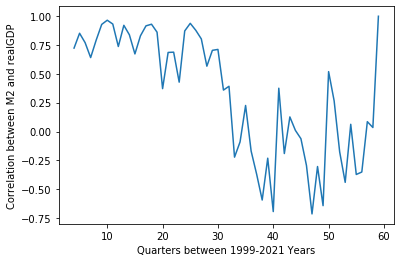

In [306]:
  
#smart=smart.dropna()
#plt.figure(figsize=(6, 6))
plt.xlabel('Quarters between 1999-2021 Years')
plt.ylabel('Correlation between M2 and realGDP')

plt.plot( smart['corr'])




#We can see that the correclation is increasing in recent year

# SCATTERPLOT VISUALIZATION

In [154]:
#year2022 is remove. to make both data tally to depict a scatterplot graph
ABC = money_supplym2.drop(money_supplym2.index[89:92], inplace=False)
ABC

,Date,Money Supply M2
0,1999Q1,1698062.0
1,1999Q2,1910333.0
2,1999Q3,1906874.0
3,1999Q4,2032158.0
4,2000Q1,2166808.0
...,...,...
84,2020Q1,89861867.0
85,2020Q2,97271170.0
86,2020Q3,102565363.0
87,2020Q4,110075856.0


<Figure size 864x72 with 0 Axes>

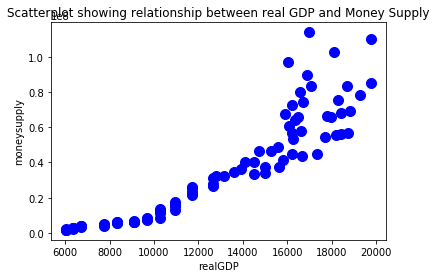

<Figure size 864x72 with 0 Axes>

In [157]:
# Load data into DataFrame
# Draw a scatter plot


plt.title('Scatterplot showing relationship between real GDP and Money Supply')
plt.xlabel('realGDP')
plt.ylabel('moneysupply')
plt.scatter(x=realGDPdata['GDP at 2010 Constant Market Prices'],y=ABC['Money Supply M2'],color= 'Blue', s=100,alpha=1)

# QUESTION 2


#Is the correlation decreasing or increasing between money supply and nominal GDP in recent years?

In [158]:
#Correclation between moneysuply and GDP at current Marketprices
corrNorm = money_supplym2['Money Supply M2'].corr(NorminalGDP['GDPatCurrentMarketPrices'])

corrNorm

0.973404118646151

#It is discover that there exist a strong correlation between GDP at current prices and Money Supply

In [264]:
#rollingcorrelation in 5periods

Q2a = money_supplym2['Money Supply M2'].rolling(5).corr(NorminalGDP['GDPatCurrentMarketPrices']).round(5)
Q2a.head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4     0.72161
5     0.84994
6     0.76866
7     0.63960
8     0.79065
9     0.92657
10    0.96271
11    0.92967
12    0.73546
13    0.91871
14    0.83668
15    0.67117
16    0.82804
17    0.91405
18    0.92808
19    0.85915
dtype: float64

In [281]:
#Convert series into dataframe

Q2update = pd.DataFrame(Q2a, columns=['corr2']).reset_index().round(5)

#smart =testing.to_frame().reset_index(inplace= False)
Q2update.head()

,index,corr2
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,0.72161


In [282]:
#drop index

Q2update = Q2update.drop('index', axis=1)

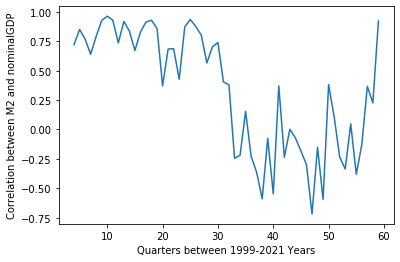

In [305]:
#smart=smart.dropna()
#plt.figure(figsize=(6, 6))
plt.xlabel('Quarters between 1999-2021 Years')
plt.ylabel('Correlation between M2 and nominalGDP')

plt.plot( Q2update['corr2'])

#We can see that the correclation is increasing in recent year

# SCATTERPLOT VISUALIZATION

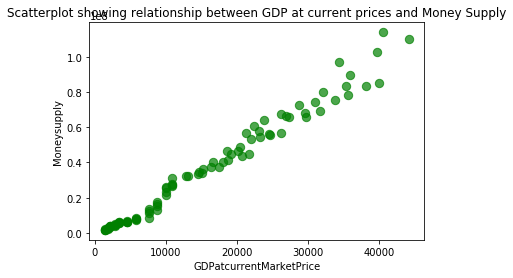

In [284]:
plt.title('Scatterplot showing relationship between GDP at current prices and Money Supply')
plt.xlabel('GDPatcurrentMarketPrice')
plt.ylabel('Moneysupply')
plt.scatter(x=NorminalGDP['GDPatCurrentMarketPrices'], y=ABC['Money Supply M2'],color= 'Green', s=70,alpha= 0.7)

#plt.rcParams["figure.figsize"] = (20,30)

The boxplot depicts the relationship between the two monatary variables listed in the graph

# QUESTION 3

#Is the correlation decreasing or increasing between money supply and money market rate in recent years?

In [79]:
#Quaterly perchange is looked into

M2supplypercent = money_supplym2['Money Supply M2'].pct_change().round(3)

M2percent =M2supplypercent.to_frame().reset_index()
M2percent

,index,Money Supply M2
0,0,NaN
1,1,0.125
2,2,-0.002
3,3,0.066
4,4,0.066
...,...,...
87,87,0.073
88,88,0.035
89,89,0.018
90,90,0.043


In [136]:
M2percent.info()

M2percent['Money Supply M2']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            92 non-null     int64  
 1   Money Supply M2  91 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


In [82]:
#Correclation between moneysuply and money market rate
corrNormRate = M2percent['Money Supply M2'].corr(MPRATE['MPR'])
corrNormRate

-0.040426794756551

Findings show that one percent increase in Money market rate leads to 4 percent decrease in Money supply rate

In [301]:
#rollingcorrelation in 5periods

corrNormRate2 = money_supplym2['Money Supply M2'].rolling(7).corr(MPRATE['MPR']).round(5)
corrNormRate2.head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6     0.78061
7     0.74241
8     0.64874
9     0.54781
10    0.31047
11    0.70831
12    0.85476
13   -0.21436
14   -0.84215
15   -0.96340
16   -0.89745
17   -0.80550
18   -0.72201
19   -0.53497
dtype: float64

In [302]:
#Convert series into dataframe

corrNormRate3 = pd.DataFrame(corrNormRate2, columns=['corr3']).reset_index().round(5)

corrNormRate3.head(7)

,index,corr3
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
5,5,NaN
6,6,0.78061


In [303]:
#drop index

NormRate3 =corrNormRate3.drop('index', axis=1)

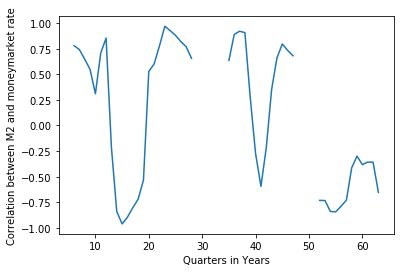

In [304]:
#moving windows correlation


plt.xlabel('Quarters in Years')
plt.ylabel('Correlation between M2 and moneymarket rate')

plt.plot(NormRate3['corr3'])

In [ ]:
#We can see that the correclation is decreasing in recent years

# QUESTION 4

In [ ]:
Can you identify some predicting power of monetary aggregates on studied variables (inflation, real output, nominal output)

From the above analysis , Monetary aggreagtes like money supply M2 or M3 have a strong predictive power on variable  like: 
real and nomimal output. With M2 money supply, an increase in M2 leads to 0.93% corresponding increase in nominal output and 0.86% corresponding out in real output


<a id='limit'></a>
## Limitation 

.Some data does not provide quartely report as we base the analysis on quaterly trends.

.There exist empty data (NAN) in some of the datasheet

.The statistical dataset contains objects and floating values which requires cleaning

<a id='conclusions'></a>
## Conclusion


Research findings show that as increase in money supply increase both real and norminal GDP but a stronger increase on GDP at current maket prices. Indepth analysis shows that for every MPR (Monetary policy rate) there is a  four percent decresase in money supply in circulation in developing economies like Nigeria.